In [11]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import bootstrap

import matplotlib.pyplot as plt
from time import time

In [12]:
cd /Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/Formatted with YOE

/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/Formatted with YOE


In [13]:
ls

ALL-BPD-AB953-DUSK-LOC.csv    ALL-SDPD-AB953.csv
ALL-BPD-AB953.csv             ALL-SFPD-AB953-DUSK-LOC.csv
ALL-MARIN-AB953-DUSK-LOC.csv  ALL-SFPD-AB953-DUSK.csv
ALL-MARIN-AB953.csv           ALL-SFPD-AB953.csv
ALL-OAKLAND-AB953-DUSK.csv    for final analysis/
ALL-OAKLAND_PD-AB953.csv      marin_zips - Sheet1.csv
ALL-SDPD-AB953-DUSK.csv       sf_zips.csv


In [5]:
# import os
# from glob import glob

# PATH = os.getcwd()
# EXT = "*.csv"

# for path, subdir, files in os.walk(PATH):
#     for file in glob(os.path.join(path, EXT)):
#         if '-LOC' not in file:
#             print(file.replace('/Users/karatechop/Documents/GitHub/senior-thesis-pretextual-stops/Data/Formatted with YOE/','',
#         )) 

In [14]:
SFPD = pd.read_csv('ALL-SFPD-AB953-DUSK.csv')
SFPD['hour'] = pd.to_datetime(SFPD['time']).dt.hour
SFPD_EDA = SFPD[(SFPD['hour']>=4)&(SFPD['hour']<=23)]
SFPD_EDA_day = SFPD_EDA[SFPD_EDA['dark']==0]
SFPD_EDA_night = SFPD_EDA[SFPD_EDA['dark']==1]
SFPD_EDA.head()

,date,time,Experience,race,type,location,sunsettime,dusktime,mins_sunset,mins_dusk,mins_stop_time,mins_before_dusk,itp,dark,hour
0,2018-07-01,1900-01-01 18:11:00,3.0,hispanic/latino(a),1 Moving,MISSION ST & 8TH ST,20:35:16,21:07:00,1235.0,1267.0,1091.0,176.0,1,0,18
1,2018-07-01,1900-01-01 14:34:00,19.0,asian,1 Moving,FOLSOM ST & 2ND ST,20:35:16,21:07:00,1235.0,1267.0,874.0,393.0,0,0,14
2,2018-07-01,1900-01-01 16:26:00,1.0,hispanic/latino(a),2 Equipment,SUNBEAM LN & JUNIOR TER,20:35:16,21:07:00,1235.0,1267.0,986.0,281.0,0,0,16
3,2018-07-01,1900-01-01 12:37:00,12.0,white,1 Moving,CLOUD CIR & SCIENCE CIR,20:35:16,21:07:00,1235.0,1267.0,757.0,510.0,0,0,12
4,2018-07-01,1900-01-01 18:34:00,17.0,middle eastern or south asian,1 Moving,S. McDonnell Rd North of Millbrae Gate,20:35:16,21:07:00,1235.0,1267.0,1114.0,153.0,1,0,18


([<matplotlib.axis.XTick at 0x7fac2bd46110>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

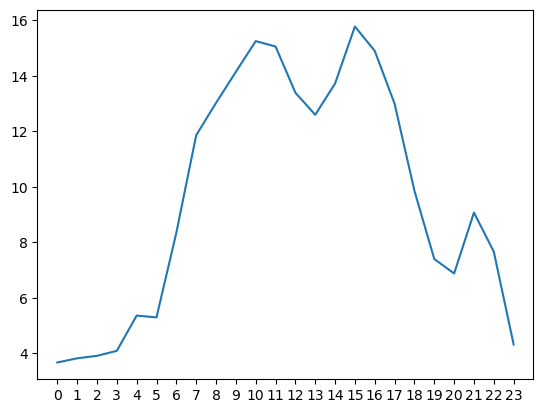

In [25]:
SFPD_hourly = SFPD[['Experience','hour']].groupby('hour',as_index=False).mean().rename(columns={'Experience':'avg experience'})
SFPD_hourly
plt.plot(SFPD_hourly['hour'],SFPD_hourly['avg experience'])
plt.xlim(-1,24)
plt.xticks(np.arange(0,24))

In [16]:
SFPD_officers = SFPD[['Experience','hour']]
SFPD_officers.loc[(SFPD_officers['hour']>=9) & (SFPD_officers['hour']<=17),'shift cat'] = '9-5'
SFPD_officers.loc[(SFPD_officers['shift cat'].isna()),'shift cat'] = 'else'


/var/folders/td/yc8lq2qx2ks3ck292tbf6wtm0000gn/T/ipykernel_4553/2659710061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFPD_officers.loc[(SFPD_officers['hour']>=9) & (SFPD_officers['hour']<=17),'shift cat'] = '9-5'


In [147]:
SFPD_EDA_day.shape

(94855, 15)

In [21]:
from scipy.stats import ttest_ind

group_a = SFPD_EDA_day['Experience']
group_b = SFPD_EDA_night['Experience']

t_value,p_value=stats.ttest_ind(group_a,group_b,equal_var=True)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)


Test statistic is 96.767290
p-value for two tailed test is 0.000000


In [9]:
from scipy.stats import ttest_ind

group_a = SFPD_officers[SFPD_officers['shift cat']=='9-5']['Experience']
group_b = SFPD_officers[SFPD_officers['shift cat']!='9-5']['Experience']

t_value,p_value=stats.ttest_ind(group_a,group_b)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

alpha = 0.05

NameError: name 'SFPD_officers' is not defined

In [140]:
diffs = []

def bootstrap_mean(df, varname):
    bootstrapped = df.sample(n=len(df), replace=True)
    return bootstrapped[varname].mean()


for i in range(10000):
    day_mean = bootstrap_mean(SFPD_EDA_day,'Experience')
    night_mean = bootstrap_mean(SFPD_EDA_night,'Experience')
    diffs.append(day_mean-night_mean)

SE = np.std(diffs).round(2)
CI95 = np.percentile(diffs, [5, 95]).round(2)
# p_val = np.logical_or(np.array(diffs) >= observed_diff, np.array(diffs) <= -observed_diff).mean()
null = [i for i in diffs if i==0]
p_val_null = len(null)/len(diffs) 

print(f"standard error: {SE}\n\nCI: {CI95}\np_val_null: {p_val_null:.3f}")

standard error: 0.06

CI: [5.94 6.12]
p_val_null: 0.000


In [ ]:
data = (SFPD_EDA_day['Experience'].astype(int).values,)  # samples must be in a sequence
data

res = bootstrap(data, np.std,n_resamples=10, confidence_level=0.95)
res

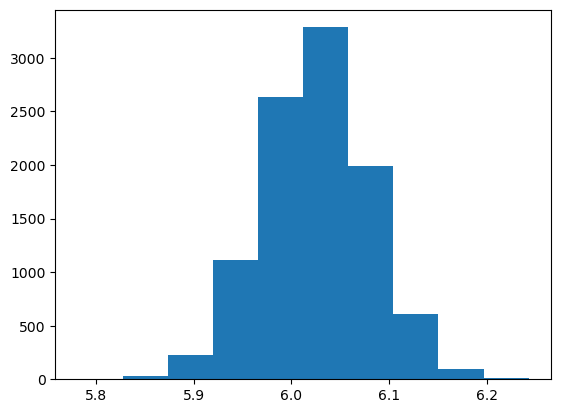

In [35]:
plt.hist(diffs);